<a href="https://colab.research.google.com/github/joshgregory42/practical_deep_learning/blob/main/ch_13_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

**Feature engineering**: Creating new transformations of the inputs data in order to make it easier to model.

In an image, a feature is a visually distinctive attribute.

Example of a convolution:



In [6]:
# Create a kernel

from fastai.vision.all import *
matplotlib.rc('image', cmap='Greys')

top_edge = tensor([[-1, -1, -1],
                   [0, 0, 0],
                   [1, 1, 1]]).float()

<Axes: >

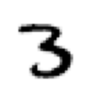

In [7]:
# Grab image

path = untar_data(URLs.MNIST_SAMPLE)

im3 = Image.open(path/'train'/'3'/'12.png')

show_image(im3)

Take the top 3x3-pixel square of our image and multiply each of those values by every value in our kernel, then add them:

In [5]:
im3_t = tensor(im3)

im3_t[0:3, 0:3] * top_edge

tensor([[-0., -0., -0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [8]:
(im3_t[0:3,0:3] * top_edge).sum()

tensor(0.)

Pick a couple of interesting spots:

In [9]:
df = pd.DataFrame(im3_t[:10,:20])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,12,99,91,142,155,246,182,155,155,155,155,131,52,0,0,0,0
6,0,0,0,138,254,254,254,254,254,254,254,254,254,254,254,252,210,122,33,0
7,0,0,0,220,254,254,254,235,189,189,189,189,150,189,205,254,254,254,75,0
8,0,0,0,35,74,35,35,25,0,0,0,0,0,0,13,224,254,254,153,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,254,254,247,53,0


Top edge at cell 5,8. Repeat our calculation there:

In [10]:
(im3_t[4:7, 6:9] * top_edge).sum()

tensor(762.)

Try the right edge at cell 8, 18:

In [11]:
(im3_t[7:10, 17:20] * top_edge).sum()

tensor(-29.)